In [236]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')


# About Dataset
This dataset is take from **KAGGLE**. It is about Default Payments of Credit Card Clients in Taiwan from 2005

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
#### Link of the dataset 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Content
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


# Main objective
We will predict the payment defaulters on the basis of the dataset provided.Dataset will be splitted into train and test sets.Training dataset will then be trained on different models after that we will find which model will works the best. Best criteria will be based on on accuracy, f1 etc

# Stakeholders
By this analysis, our stakeholders will get to know that how our customers are defaulting and customer who have the tendency to default in future payments. It will be very beneficial for our stakeholders to get to know in advance, which customers are going to default beacuse if they know who all have the tendencies to deafault then they can concentreate on creating strategies and robust rules so that customers should default less.

In [237]:
data=pd.read_csv('/kaggle/input/uci-credit-card/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Cleaning and Exploration

In [238]:
data.shape

(30000, 25)

In [239]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [240]:
data.columns=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default']
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [241]:
# Finding the unique values in every column
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11


In [242]:
# Check for missing values in dataset  - There are no missing values in the dataset
# All the variables are numeric in nature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [243]:
# sns.pairplot(data)

In [244]:
# Check for duplicate customer ids # no duplicate ids found
data.ID.duplicated(keep=False).count()

30000

<AxesSubplot:>

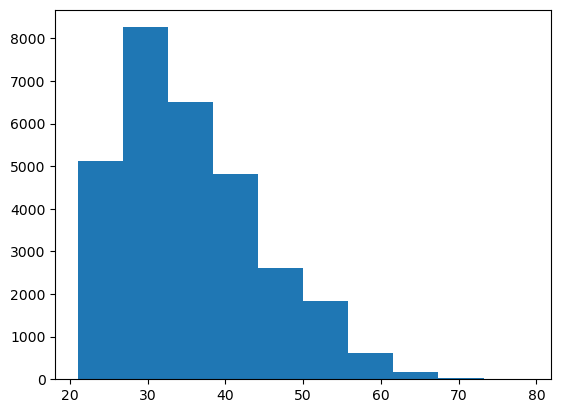

In [245]:
# All age values are scattered around 29 to 74
data.AGE.hist(grid=False)

In [ ]:
sns.pairplot(data)

<AxesSubplot:>

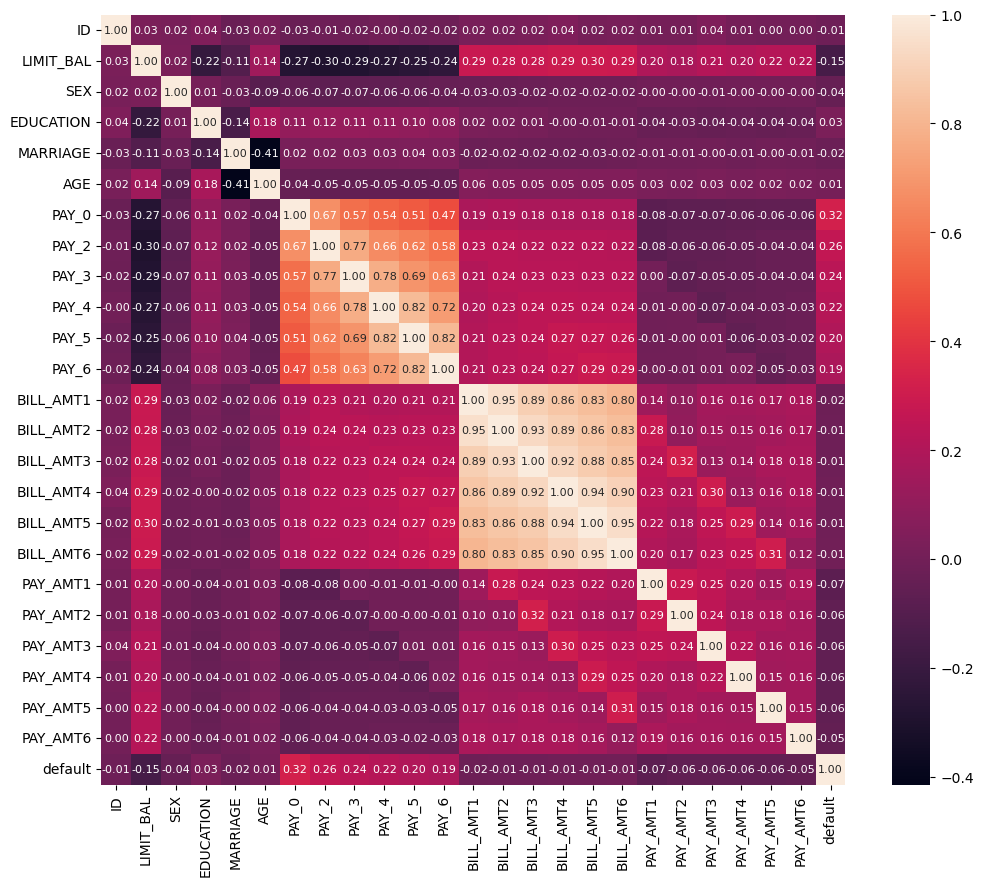

In [246]:
# Checking the correlation between varibles
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, linewidths=0,fmt='.2f',annot_kws={"size": 8})

In [247]:
# Check the dataset target variables is balanced or unbalanced
print("Defaulters are more in numbers than non defaulters \n",data.default.value_counts(normalize=True),"")

Defaulters are more in numbers than non defaulters 
 0    0.7788
1    0.2212
Name: default, dtype: float64 


# Splitting Data

In [248]:

# Get the split indexes
feature_cols = list(data.columns)
feature_cols.remove('default')
stratified_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train, test = next(stratified_shuf_split.split(data[feature_cols], data.default))
# Create the dataframes
X_train = data.loc[train, feature_cols]
y_train = data.loc[train, 'default']

X_test  = data.loc[test, feature_cols]
y_test  = data.loc[test, 'default']
len(X_test), len(X_train)

(9000, 21000)

In [249]:
# effects of stratified shufflesplit
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0    0.77881
 1    0.22119
 Name: default, dtype: float64,
 0    0.778778
 1    0.221222
 Name: default, dtype: float64)

# Model Training and Predictions

# Logistic Regression

In [250]:
# Standard logistic regression
# Fitting the model
lr = LogisticRegression().fit(X_train, y_train)
# Fitting the model
y_pred_lr = lr.predict(X_test)
# Calculating  the metrices
lr_stats = pd.Series({'precision':precision_score(y_test, y_pred_lr),
                      'recall':recall_score(y_test, y_pred_lr),
                      'accuracy':accuracy_score(y_test, y_pred_lr),
                      'f1score':f1_score(y_test, y_pred_lr),
                      'auc': roc_auc_score(y_test, y_pred_lr)},
                     name='Logistic Regression')

df_lr_final=pd.DataFrame(lr_stats).transpose()
df_lr_final

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.0,0.0,0.778778,0.0,0.5


Text(0.5, 14.722222222222216, 'Ground Truth')

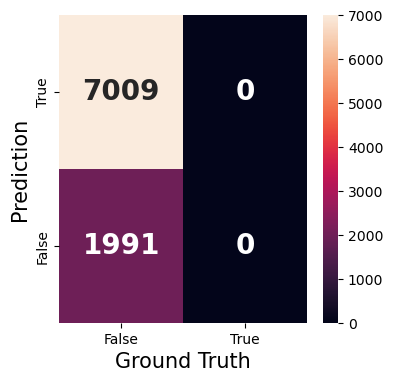

In [251]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

# K Nearest neighbors

In [252]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Fitting the model
knn = knn.fit(X_train, y_train)
# Predicting the model
y_pred_knn = knn.predict(X_test)
# Calculating  the metrices
knn_stats = pd.Series({'precision':precision_score(y_test, y_pred_knn),
                      'recall':recall_score(y_test, y_pred_knn),
                      'accuracy':accuracy_score(y_test, y_pred_knn),
                      'f1score':f1_score(y_test, y_pred_knn),
                      'auc': roc_auc_score(y_test, y_pred_knn)
                                      }, name='KNN')

df_knn_final=pd.DataFrame(knn_stats).transpose()
df_knn_final

,precision,recall,accuracy,f1score,auc
KNN,0.329779,0.217479,0.729111,0.262107,0.545963


Text(0.5, 14.722222222222216, 'Ground Truth')

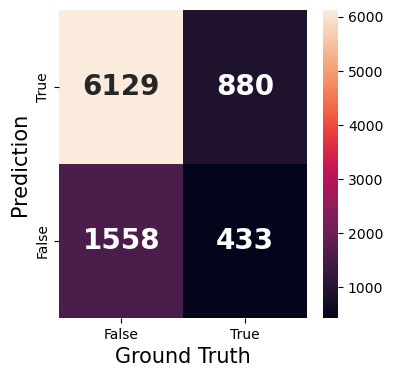

In [253]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

# Decision Trees

In [254]:
dt = DecisionTreeClassifier(random_state=42)
# Fitting the model
dt.fit(X_train, y_train)
# Predicting the model
y_pred_dt = dt.predict(X_test)
# Calculating  the metrices
dt_stats = pd.Series({'precision':precision_score(y_test, y_pred_dt),
                      'recall':recall_score(y_test, y_pred_dt),
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')

df_dt_final=pd.DataFrame(dt_stats).transpose()
df_dt_final

,precision,recall,accuracy,f1score,auc
Decision Tree,0.385525,0.409342,0.72,0.4,0.61


Text(0.5, 14.722222222222216, 'Ground Truth')

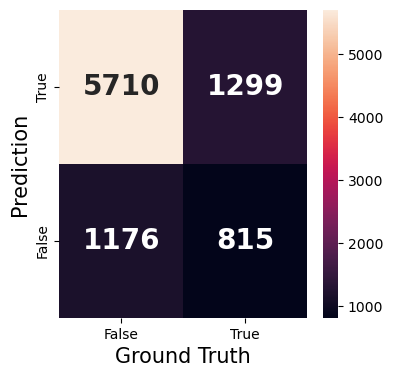

In [255]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

# Random Forests

In [256]:
# Initialize the random forest estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1,max_depth=3)
# Fitting the model
rf.fit(X_train, y_train)
# Predicting the model
y_pred_rf = rf.predict(X_test)
# Calculating  the metrices
rf_stats = pd.Series({'precision':precision_score(y_test, y_pred_rf),
                      'recall':recall_score(y_test, y_pred_rf),
                      'accuracy':round(accuracy_score(y_test, y_pred_rf), 2),
                      'f1score':round(f1_score(y_test, y_pred_rf), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_rf),2)}, name='Random Forest')

df_rf_final=pd.DataFrame(rf_stats).transpose()
df_rf_final

,precision,recall,accuracy,f1score,auc
Random Forest,0.680292,0.234053,0.81,0.35,0.6


Text(0.5, 14.722222222222216, 'Ground Truth')

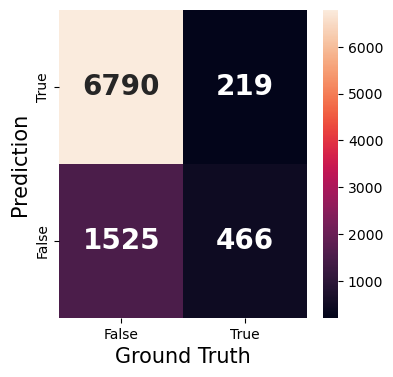

In [257]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

# Gradient Boosting Classifier

In [258]:
# Initialize the random forest estimator
gb = GradientBoostingClassifier(random_state=42,max_depth=3)
# Fiting the model
gb.fit(X_train, y_train)
# Predicting the model
y_pred_gb = gb.predict(X_test)
# Calculating  the metrices
gb_stats = pd.Series({'precision':precision_score(y_test, y_pred_gb),
                      'recall':recall_score(y_test, y_pred_gb),
                      'accuracy':round(accuracy_score(y_test, y_pred_gb), 2),
                      'f1score':round(f1_score(y_test, y_pred_gb), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_gb),2)}, name='Gradient boosting')

df_gb_final=pd.DataFrame(gb_stats).transpose()
df_gb_final

,precision,recall,accuracy,f1score,auc
Gradient boosting,0.666983,0.353089,0.82,0.46,0.65


Text(0.5, 14.722222222222216, 'Ground Truth')

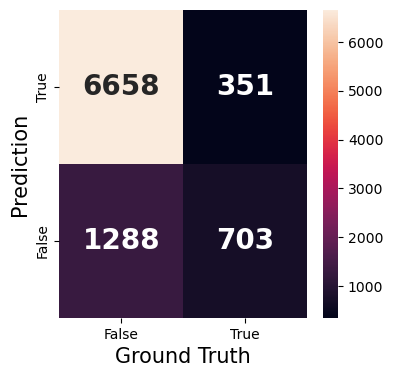

In [259]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

# Summary

I have created 5 models logistic, KNN, decision tree, random forests and gradient boosting and used five different validation metrices. below is the summary of all provided how they have performed.
All the models are trained on same training sets and tested on same test sets. Also, almost all of the models used same parameters.
From the **confusion matrix** it is evident that **Logistic Regression** performed very badly with **ZERO precision and recall**.
KNN and Decision Tree model gave some edge as precision, recall and f1 scores starts to improve in these two models by decreasing some accuracy
I think gradient boosting method have performed very well as compared to other models with highest accuracy,Precision, recall and highest f1-score.



In [260]:
final_report=df_lr_final.append(df_knn_final).append(df_dt_final).append(df_rf_final).append(df_gb_final)
final_report

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.000000,0.000000,0.778778,0.000000,0.500000
KNN,0.329779,0.217479,0.729111,0.262107,0.545963
Decision Tree,0.385525,0.409342,0.720000,0.400000,0.610000
Random Forest,0.680292,0.234053,0.810000,0.350000,0.600000
Gradient boosting,0.666983,0.353089,0.820000,0.460000,0.650000


# Feature Importance

<AxesSubplot:>

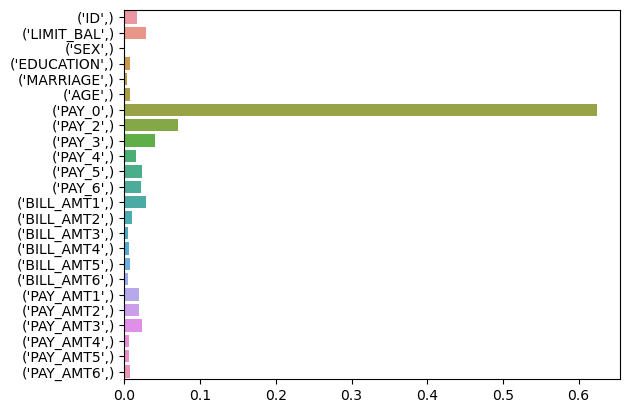

In [261]:
assert len(gb.feature_importances_)==len(X_train.columns)
feature_imp=pd.DataFrame(gb.feature_importances_).transpose()
feature_imp.columns=[X_train.columns]
sns.barplot(feature_imp,orient='h')

# Suggestions and next steps for revisiting the model

We could further optimize these models
1. Using **GridSearchCV** that will find the best parameters for every model.
2. Using Sampling because data is **unbalanced**, so we can also look from that angle also to increase the accuracy of the model.
3. We could also change our model based on the **inputs received from our stakeholders** about the business.
4. We could also use XGboost model